# Bank Customer Churn Prediction #
        To build a prediction model which will predict if the customer churn or not 

## Import library 

In [1]:
import  pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

## Import the Dataset ##

In [2]:
df=pd.read_csv(r"C:\Users\antho\OneDrive\Desktop\cus.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore,Card Type,Point Earned,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore,Card Type,Point Earned,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,3,DIAMOND,911,0


In [5]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Complain             0
SatisfactionScore    0
Card Type            0
Point Earned         0
Exited               0
dtype: int64

In [6]:
data=df.copy()

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore,Card Type,Point Earned,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0


In [8]:
data=data.drop(["RowNumber", "CustomerId", "Surname","Geography"],axis=1)


In [9]:
data.shape

(10000, 14)

In [10]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore,Point Earned,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.204400,3.013800,606.515100,0.203800
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.403283,1.405919,225.924839,0.402842
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,119.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,2.000000,410.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,3.000000,605.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,4.000000,801.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,5.000000,1000.000000,1.000000


In [11]:
data.describe(include="object")

,Gender,Card Type
count,10000,10000
unique,2,4
top,Male,DIAMOND
freq,5457,2507


In [12]:
data.nunique()

CreditScore           460
Gender                  2
Age                    70
Tenure                 11
Balance              6382
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary      9999
Complain                2
SatisfactionScore       5
Card Type               4
Point Earned          785
Exited                  2
dtype: int64

In [13]:
print("The unique value of Gender is   :", data["Gender"].unique())

print("the unique value of Card_type is  :",data["Card Type"].unique())

The unique value of Gender is   : ['Female' 'Male']
the unique value of Card_type is  : ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [14]:
numaric_feature=[feature for feature in data.columns if data[feature].dtype !="O"]
category_feature=[feature for feature in data.columns if data[feature].dtype =="O"]

print("We have {} numaric feature : {}".format(len(numaric_feature),numaric_feature))

print("We have {} category feature :{}".format(len(category_feature),category_feature))

We have 12 numaric feature : ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'SatisfactionScore', 'Point Earned', 'Exited']
We have 2 category feature :['Gender', 'Card Type']


## Explore Data Analysis

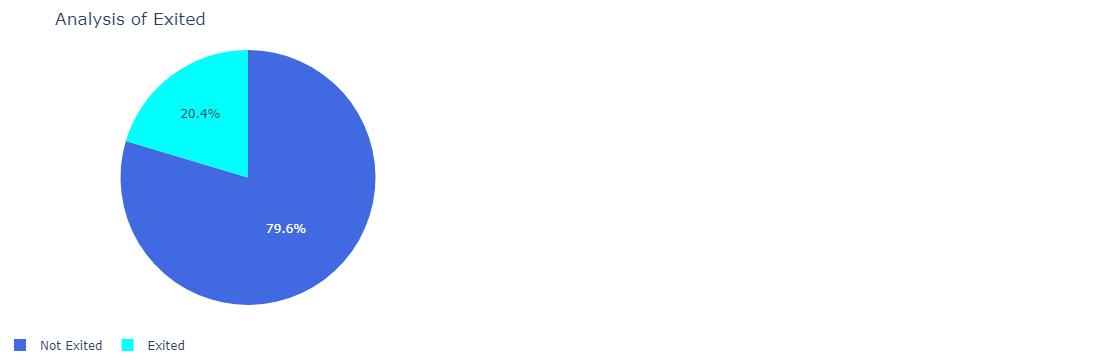

In [86]:
fifure
labels=["Exited","Not Exited"]
exited=data[data["Exited"]==1]
not_exited=data[data["Exited"]==0]
value=[len(exited),len(not_exited)]

fig=px.pie(data,names=labels,values=value,title="Analysis of Exited", 
           color=labels,color_discrete_map={"Exited":"cyan","Not Exited":"royalblue"},)
fig.update_layout(margin=dict(l=0, r=700, t=50, b=50),legend=dict(orientation="h",yanchor="top",xanchor="center" ))

fig.show()

<h4> From above analysis</h4>

       => 79.6 % customer are not exited from the bank in overall customer.
       => 20.4 % customer are exited from the bankin overall customer.

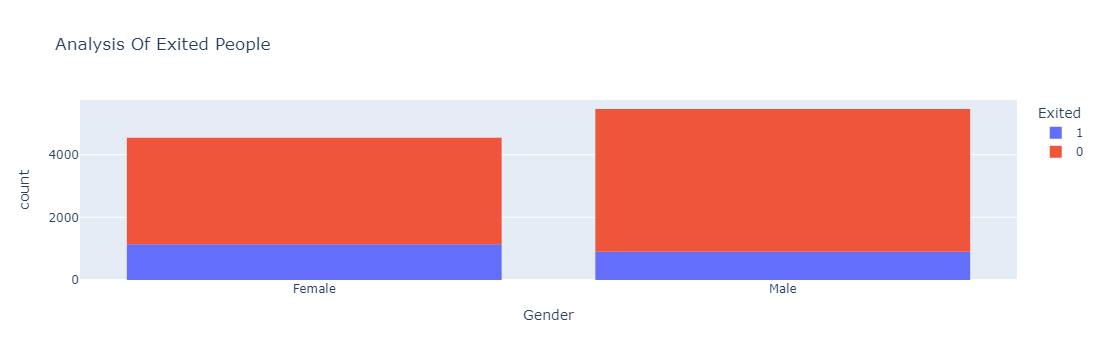

In [16]:
fig=px.histogram(data,y="Exited",x="Gender",color="Exited",histfunc="count",title="Analysis Of Exited People",height=600)
fig.show()

<h4>From the above figure</h4>

              when compare the both male and female churn data , female are highly churn  then the male
        

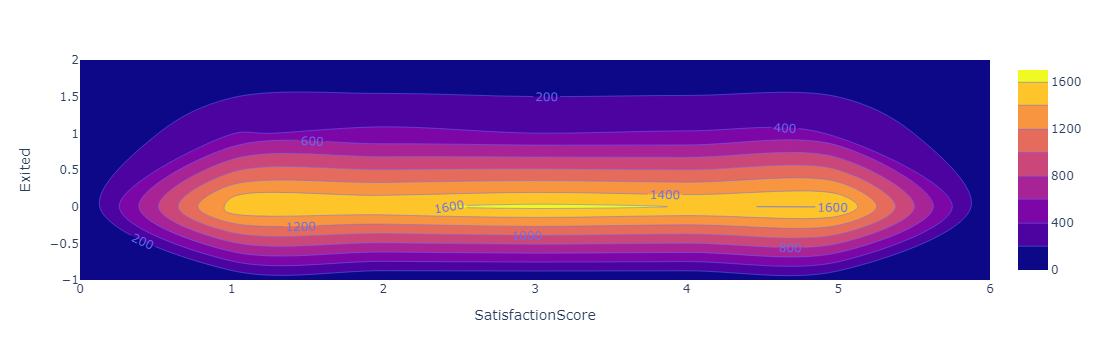

In [17]:
fig=px.density_contour(data,y="Exited",x="SatisfactionScore",height=500)
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

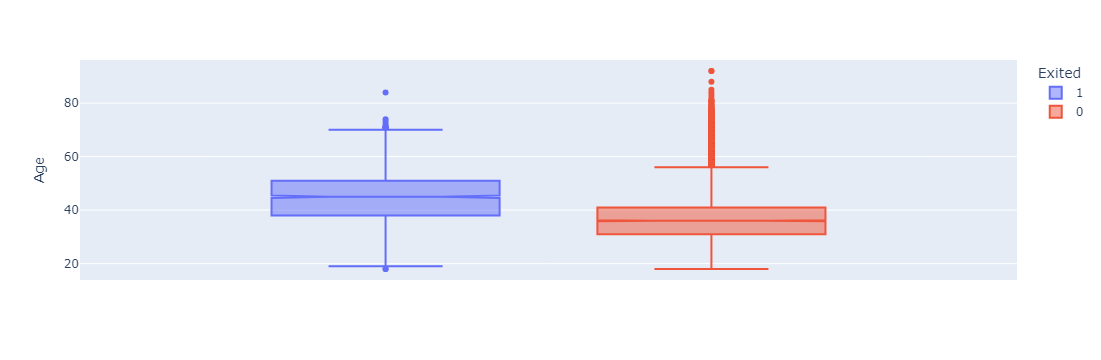

In [18]:
fig=px.box(data,y="Age",color="Exited",notched=True)
fig.show()



## Data  preprocessing

In [19]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore,Card Type,Point Earned,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0


In [20]:
data['Gender'] = np.where(data['Gender'] == 'Male',1,0)

In [21]:
data['Card Type'] = np.where(data['Card Type'] == 'DIAMOND',1,
                             np.where(data['Card Type'] == 'PLATINUM',2,
                                      np.where(data['Card Type'] == 'GOLD',3,4)))

In [22]:
X=data.drop(["Exited","Gender"],axis=1)
y=data["Exited"]

In [23]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore,Card Type,Point Earned,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1,2,1,464,1
1,608,0,41,1,83807.86,1,0,1,112542.58,1,3,1,456,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,3,1,377,1
3,699,0,39,1,0.00,2,0,0,93826.63,0,5,3,350,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,5,3,425,0


In [24]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore,Card Type,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,2,1,464
1,608,41,1,83807.86,1,0,1,112542.58,1,3,1,456
2,502,42,8,159660.80,3,1,0,113931.57,1,3,1,377
3,699,39,1,0.00,2,0,0,93826.63,0,5,3,350
4,850,43,2,125510.82,1,1,1,79084.10,0,5,3,425


## Feature selection

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select=SelectKBest(chi2,k=7)
select.fit_transform(X,y)

select_feature=select.get_support(indices=True)

print(X.columns[select_feature])

Index(['CreditScore', 'Age', 'Balance', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'SatisfactionScore'],
      dtype='object')


In [26]:
X=X.drop(["NumOfProducts","HasCrCard","Tenure","Point Earned","Card Type"],axis=1)

## Normalization 

In [28]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_data = pd.DataFrame(scaled_data)

In [29]:
scaled_data.columns = X.columns

In [30]:
X.columns

Index(['CreditScore', 'Age', 'Balance', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'SatisfactionScore'],
      dtype='object')

In [31]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Model Training and Fitting

In [32]:
X_train,X_test,y_train,y_test=train_test_split(scaled_data,y,train_size=70,test_size=30,random_state=1000)

In [33]:
X_train

,CreditScore,Age,Balance,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore
9389,0.376,0.189189,0.000000,1.0,0.400633,0.0,0.50
5280,0.438,0.135135,0.398698,0.0,0.025741,1.0,0.50
2463,0.558,0.189189,0.000000,1.0,0.389807,0.0,0.25
6533,0.278,0.391892,0.414090,1.0,0.538121,0.0,0.75
8607,0.504,0.270270,0.285646,0.0,0.685567,0.0,0.50
...,...,...,...,...,...,...,...
522,0.354,0.256757,0.373549,1.0,0.695477,0.0,0.50
4956,0.620,0.202703,0.320697,0.0,0.752126,0.0,0.25
5470,0.534,0.094595,0.408875,1.0,0.576934,0.0,1.00
3184,0.634,0.500000,0.615363,1.0,0.688383,1.0,0.50


In [34]:
X_test

,CreditScore,Age,Balance,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore
8034,0.544,0.324324,0.000000,0.0,0.595634,0.0,1.00
7122,0.354,0.378378,0.523777,0.0,0.274706,0.0,0.75
7571,0.736,0.459459,0.316763,1.0,0.162064,1.0,0.50
7347,0.406,0.324324,0.000000,0.0,0.038347,0.0,0.50
3246,0.576,0.527027,0.000000,0.0,0.168341,1.0,0.75
6972,0.490,0.459459,0.000000,1.0,0.531696,1.0,0.75
8425,0.810,0.148649,0.466468,1.0,0.109263,0.0,1.00
4001,0.390,0.472973,0.456048,0.0,0.903020,1.0,0.50
4342,0.408,0.162162,0.539542,1.0,0.898473,1.0,0.75
7930,0.300,0.270270,0.000000,0.0,0.960100,0.0,0.25


### Logistic Regression

In [35]:
lr=LogisticRegression()

In [36]:
model=lr.fit(X_train,y_train)

In [37]:
pred=model.predict(X_test)
print(pred)

[0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1]


In [38]:
log_acc=accuracy_score(y_test,pred)
print("Accuracy Score of Logistic Regression",log_acc*100)

Accuracy Score of Logistic Regression 96.66666666666667


In [39]:
class_report=classification_report(y_test,pred)

In [40]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



### Random Forest Classifier

In [41]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features=7, max_leaf_nodes=2,min_impurity_decrease=0.1,
                            min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                            oob_score=True, random_state=50, verbose=0,warm_start=False)

In [42]:
model2=rf.fit(X_train,y_train)

In [43]:
pred2=model2.predict(X_test)
print(pred2)

[0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1]


In [44]:
rf_acc=accuracy_score(y_test,pred2)
print("Accuracy Score of Random Forest",rf_acc*100)

Accuracy Score of Random Forest 96.66666666666667


In [45]:
class_report=classification_report(y_test,pred2)

In [46]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [47]:
rf_acc=accuracy_score(y_test,pred2)
print(rf)

RandomForestClassifier(max_features=7, max_leaf_nodes=2,
                       min_impurity_decrease=0.1, oob_score=True,
                       random_state=50)


### Ada Boost

In [48]:
ada_bst=AdaBoostClassifier()

In [49]:
model3=ada_bst.fit(X_train,y_train)

C:\Users\antho\anaconda3\envs\project_churn\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



In [50]:
pred3=model3.predict(X_test)
pred3

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
ada_acc=accuracy_score(y_test,pred3)
print("Ada Boost Classifier Accuracy Score",ada_acc*100)

Ada Boost Classifier Accuracy Score 90.0


In [52]:
class_report1=classification_report(y_test,pred3)
print(class_report1)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.86      0.75      0.80         8

    accuracy                           0.90        30
   macro avg       0.89      0.85      0.87        30
weighted avg       0.90      0.90      0.90        30



###  XG Boost 

In [53]:
xgb=XGBClassifier()

In [54]:
model4=xgb.fit(X_train,y_train)

In [55]:
pred4=model4.predict(X_test)

In [56]:
ada_acc=accuracy_score(y_test,pred4)
print("XG Boost Classifier Accuracy Score",ada_acc*100)

XG Boost Classifier Accuracy Score 90.0


In [57]:
class_report1=classification_report(y_test,pred4)
print(class_report1)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.86      0.75      0.80         8

    accuracy                           0.90        30
   macro avg       0.89      0.85      0.87        30
weighted avg       0.90      0.90      0.90        30



### Bagging Classifier

In [58]:
base_classifier_list = []
n_base_classifiers = 9  # Number of base classifiers to train

for i in range(n_base_classifiers):
    # Initialize base classifier (Decision Tree)
    base_classifier = DecisionTreeClassifier()
    
    # Create bootstrap sample (subset of the training data)
    X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.8, random_state=i)
    
    # Train base classifier on bootstrap sample
    base_classifier.fit(X_sample, y_sample)
    
    # Add trained base classifier to list
    base_classifier_list.append(base_classifier)

# Make predictions on the test data using each base classifier
predictions_list = []
for base_classifier in base_classifier_list:
    predictions = base_classifier.predict(X_test)
    predictions_list.append(predictions)



In [59]:

# Combine predictions using voting
combined_predictions = np.round(np.mean(predictions_list, axis=0))

In [60]:
# Evaluate combined predictions
accuracy = accuracy_score(y_test, combined_predictions)
print("Combined Predictions Accuracy:", accuracy*100)

Combined Predictions Accuracy: 93.33333333333333


In [61]:
class_report1=classification_report(y_test,combined_predictions)
print(class_report1)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30



## Load the model

In [62]:
import pickle

In [63]:
pickle.dump(model2,open('saved_model.pkl','wb'))

In [64]:
load_model=pickle.load(open('saved_model.pkl','rb'))

In [65]:
load_model.predict(X_test)

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [66]:

pickle.dump(scaler,open("preprocessing_model.pkl","wb"))

In [67]:
load_pre=pickle.load(open("preprocessing_model.pkl","rb"))